## Linear Regression
### Normal Equation
> **Better suited for small number of features.**

In [57]:
import numpy as np

np.random.seed(42)

input_shape = (100,1)
X = 2 * np.random.rand(input_shape[0], input_shape[1])
y = 4 + 3 * X + np.random.rand(input_shape[0], input_shape[1])

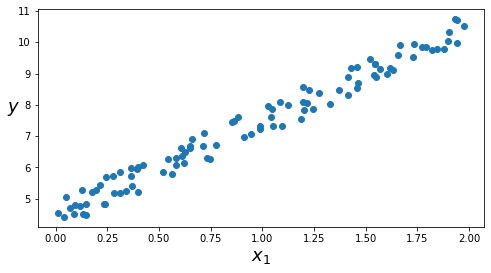

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.scatter(X, y)
plt.xlabel("$x_1$", rotation=0, fontsize=18)
plt.ylabel("$y$", rotation=0 , fontsize=18)
plt.show()

In [59]:
X_b = np.c_[np.ones(input_shape), X]  #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [60]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [61]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  #add x0 =1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

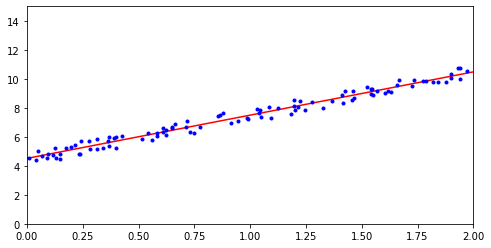

In [62]:
#plotting this model's predictions
plt.figure(figsize=(8,4))
plt.plot(X_new, y_predict ,"r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [63]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [64]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [65]:
#The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"), which you could call directly:
theta_best_svd , residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("theta:",theta_best_svd ," \nresiduals:", residuals," \nrank:", rank," \ns:", s)

theta: [[4.51359766]
 [2.98323418]]  
residuals: [8.49565526]  
rank: 2  
s: [14.37020392  4.11961067]


In [66]:
np.linalg.pinv(X_b).dot(y)

array([[4.51359766],
       [2.98323418]])

#### Computational Complexity of Linear Regression
> Normal equation computes inverse of X$^T$, which is an $(n+1)$ x $(n+1)$ matrix where n is number of features.  
The computational complexity of inverting such a matrix is typically about $O(n^{2.4})$ to  $O(n^3)$  

> The SVD (singular value decomposition) approach used by scikitlearn's LinearRegression class is about $O(n^2)$  

> Both Normal equation and SVD approach get very slow when number of features grow large e.g. 10,000.  
> But both are linear with regards to the number of instances in the training set $O(m)$, so they handle large training sets efficiently

### Gradient Descent
> **Better suited for large number of features or too many training instances to fit in memory**  

These two facts gives Gradient Descent a guaranteed approach to get closer to Global minima
- MSE cost function for <mark>LinearRegression</mark> happens to be convex function.  
- It is also continuous function that means the slope never changes abruptly.  

#### Batch Gradient Descent
- Involves calculation over full training set X at each Gradient Descent Step i.e. it uses whole batch of training data at every step so is slow


In [67]:
eta = 0.1 #Learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.51359766],
       [2.98323418]])

In [68]:
X_new_b.dot(theta)

array([[ 4.51359766],
       [10.48006601]])

In [69]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m* X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        
        if theta_path is not None:
            theta_path.append(theta)
        
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta = {}$".format(eta), fontsize = 16)

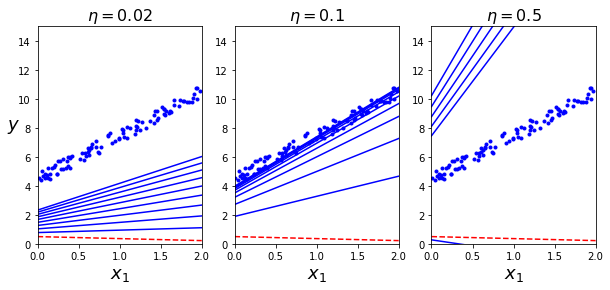

In [70]:
np.random.seed(42)

theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize = 18)

plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

#### Stochastic Gradient Descent using simple learning scheduler
> Training instances must be Independant and Indentically Distributed (IID) to ensure that paramters get pulled towards gloabl optimum.  
Simple way to ensure this is to shuffle the instances during training. ex. pick each instance randomly or shuffle the training dataset at the beginning of each epoch.

theta:  [[4.5151857 ]
 [2.97924466]]
epoch counter: 50 , training iteration counter:  5000


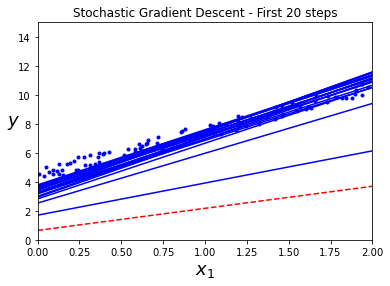

In [71]:
n_epochs = 50
t0, t1 = 5, 50

def learning_scheduler(t):
    return t0/(t+ t1)

theta = np.random.randn(2,1) #random initialization

counter_epoch = 0
counter_train = 0

for epoch in range(n_epochs):
    counter_epoch +=1
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+ 1]
        yi = y[random_index : random_index+ 1]
        gradients = 2* xi.T.dot(xi.dot(theta) - yi)
        eta = learning_scheduler(epoch * m + i)
        theta = theta - eta * gradients
        counter_train +=1
        
    
print("theta: ",theta)
print("epoch counter:",counter_epoch, ", training iteration counter: ",counter_train)

plt.plot(X, y , "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.title("Stochastic Gradient Descent - First 20 steps")
plt.show()

In [72]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.51785974]), array([2.99661517]))

#### Mini Batch Gradient Descent

In [73]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
    
theta

array([[4.52651397],
       [2.99723869]])

## Polynomial Regression

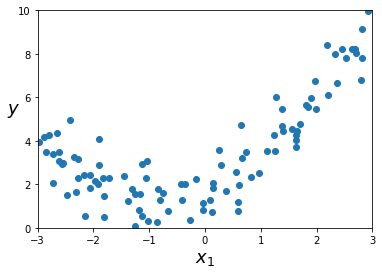

In [83]:
np.random.seed(42)
m =100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

In [98]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [99]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

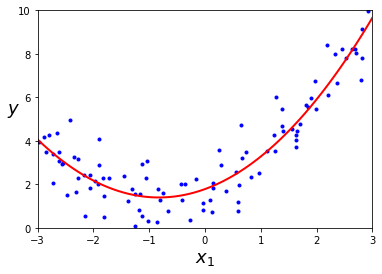

In [100]:
X_new = np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth = 2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0 ,10])
plt.show()

When there are multiple features, polynomial regression is capable of finding relationships between features, which something plain LinearRegression can't do.

Note: PolynomialFeatures(degree=d) transforms array containing m features into $(n+d)!{/d!n!}$

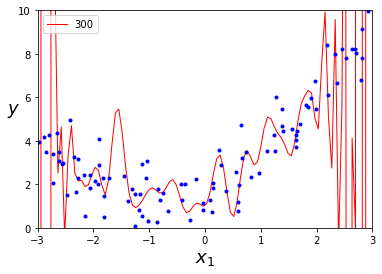

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

polybig_features = PolynomialFeatures(degree=100, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()
polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)
plt.plot(X_new, y_newbig, "r-", label=str(300), linewidth=1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0 ,10])
plt.legend(loc="upper left")
plt.show()

In [107]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val , y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [],[]
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3 ,label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

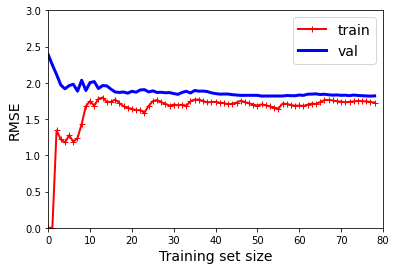

In [109]:
lin_reg = LinearRegression()

plot_learning_curves(lin_reg, X, y)
plt.axis([0,80,0,3])
plt.show()

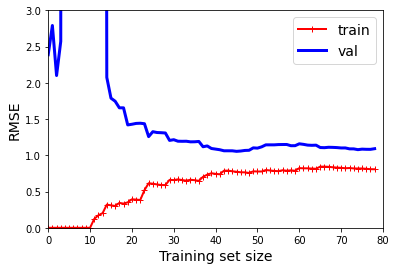

In [111]:
#10th degree poly model
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression,X, y)
plt.axis([0,80,0,3])
plt.show()

## Regularized Linear Models
### Ridge Regression
- Regularized version of linear regression
- Forces algortihm to fit the data and keep the model weights as small as possible by adding regularization term to the cost function.  

Regularization term should only be added to the cost function during training.
Once model is trained, we should evaluate model's performance using unregulized performance measure  
Note: Bias term $\theta_0$ is not regularized. So regularization term below start from $1 \leq i \leq n $

$J(\theta) = MSE(\theta) + \alpha \sum_{\substack{
   1 \leq i \leq n  
  }} \theta_i^2 $
  
It is important to scale data i.e. StandardScaler before performing Ridge Regression as  it is sensitive to the scale of the input features

- Closed form solution  
    $\hat{\theta}$ = $(X^T X + \alpha A)^{-1} X^T y$

In [112]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m ,1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0,3, 100).reshape(100,1)

In [113]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1 , solver='cholesky', random_state=42)
ridge_reg.fit(X , y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [114]:
ridge_reg = Ridge(alpha=1 , solver='sag', random_state=42)
ridge_reg.fit(X , y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

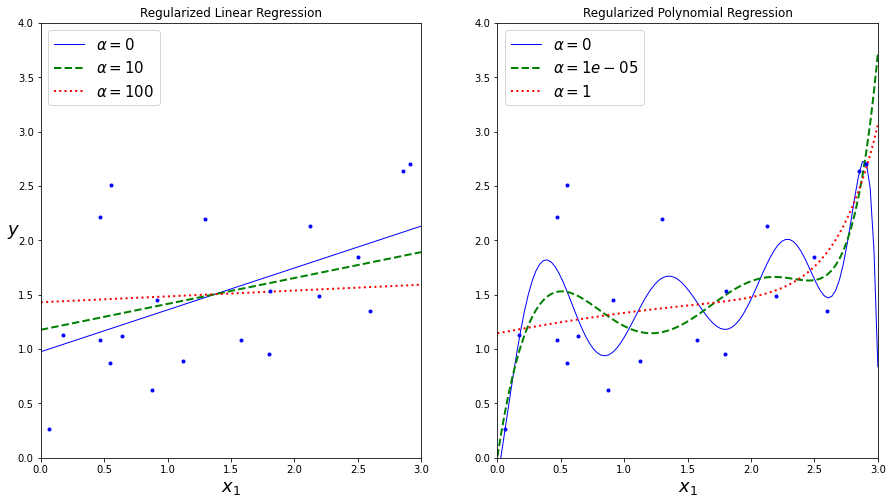

In [123]:
def plot_model(model_class , polynomial, alphas , **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        
        if polynomial:
            model = Pipeline([
                ("poly_features" , PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label = r"$\alpha = {}$".format(alpha))
    
    plt.plot(X,y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0 , 3, 0 , 4])
    
plt.figure(figsize=(15, 8))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state= 42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Regularized Linear Regression")

plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state= 42)
plt.title("Regularized Polynomial Regression")
plt.show()

Specifying ***"l2"*** indicates that you want SGD to add regularization term to the cost function equal to half the square of the $l_2$ norm of the weight vector

In [125]:
#Regularizaztion Using SGD
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol = 1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

### Lasso Regression
Least Absolute Shrinkage.  
It also adds regularization term to the cost function but it uses $l_1$ norm  of the weight vector instead of $l_2$ norm

$J(\theta) = MSE(\theta) + \alpha \sum_{\substack{
    1 \leq i \leq n
}} |\theta_i|$

It tends to eliminate the weights of least important features (i.e. set them to zero). ex. from below plot, the dashed line in the right plot $\alpha = 10^{-7}$ looks quadratric almost linear

C:\Users\mruty\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827432, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


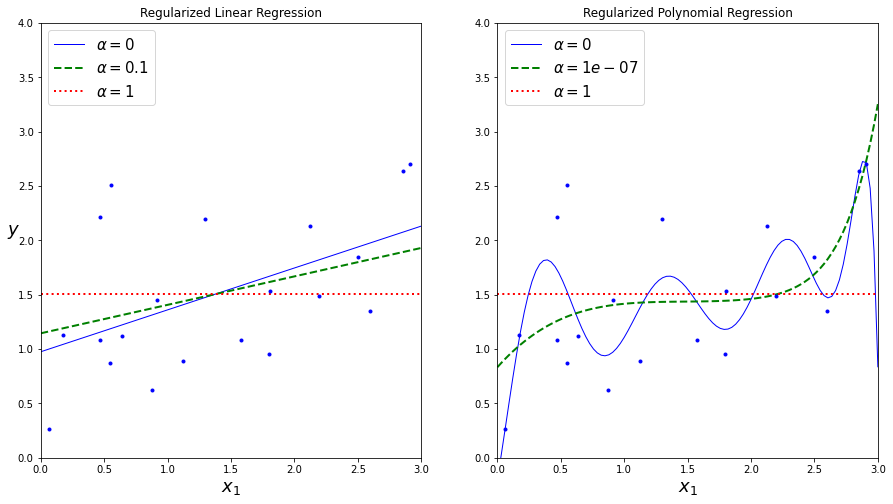

In [127]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(15, 8))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Regularized Linear Regression")

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.title("Regularized Polynomial Regression")
plt.show()